In [9]:
import Tools
from photoObject import *
from MCMCObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from Tools import *
from joblib import Parallel, delayed

In [40]:
Catalog=ascii.read("../A-Catalogs/Binospec-Candels.cat")
Catalog_old=ascii.read("../A-Catalogs/Binospec-Candels_FWHMold.cat")

In [41]:
restorevoff=Catalog_old["voff"]
restoredvoff=Catalog_old["dvoff"]

Catalog["voff"]=restorevoff
Catalog["dvoff"]=restoredvoff
ascii.write(Catalog,"../A-Catalogs/Binospec-Candels.cat",overwrite=True)

In [32]:
zsys=Catalog["zsys"]
zlya=Catalog["z"]

voffset=Catalog["voff"]

newvoffset=Tools.vOffset(zlya,zsys)
Catalog["voff"]=newvoffset

for gal in Catalog:
    if gal["voff"]<0:
        gal["voff"]=60
        gal["dvoff"]=np.nan

ascii.write(Catalog,"../A-Catalogs/Binospec-Candels.cat",overwrite=True)

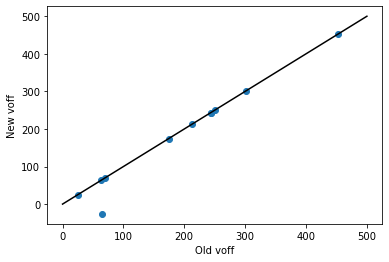

In [33]:
plt.scatter(voffset,newvoffset)
plt.plot([0,500],[0,500],color="black")
plt.xlabel("Old voff")
plt.ylabel("New voff")
plt.show()

In [38]:
print(Catalog[~np.isnan(Catalog["voff"])]["id_charlotte"])

    id_charlotte   
-------------------
       z6_GNW_14511
       z6_GND_36100
       z6_GND_43125
        z7_GND_8358
       z5_GND_39445
       z5_GND_27819
       z5_GND_21153
       z5_GND_17752
   Stark11_33_17705
   Stark11_34_24923
Jung18_z6_GND_28438


In [39]:
print(Catalog[~np.isnan(Catalog["voff"])]["voff"])

       voff       
------------------
174.55498707110712
243.80359893811166
 69.36531200315174
243.14350220141066
25.087363940987586
213.23169173925726
250.45973482636285
              60.0
 451.9369003829553
 63.46731083032625
 301.0853038271308
